# PCA on Images

In [131]:
# PCA

import numpy as np
import pandas as pd

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import seaborn as sns

from sklearn.preprocessing import StandardScaler



In [132]:
# import npy files

X_train = np.load('x_train.npy')
X_test = np.load('x_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

In [133]:
(X_train.shape,y_train.shape)

((1280, 224, 224, 3), (1280,))

In [134]:
(X_test.shape,y_test.shape)

((320, 224, 224, 3), (320,))

In [135]:
img =X_train[5]
img.shape

(224, 224, 3)

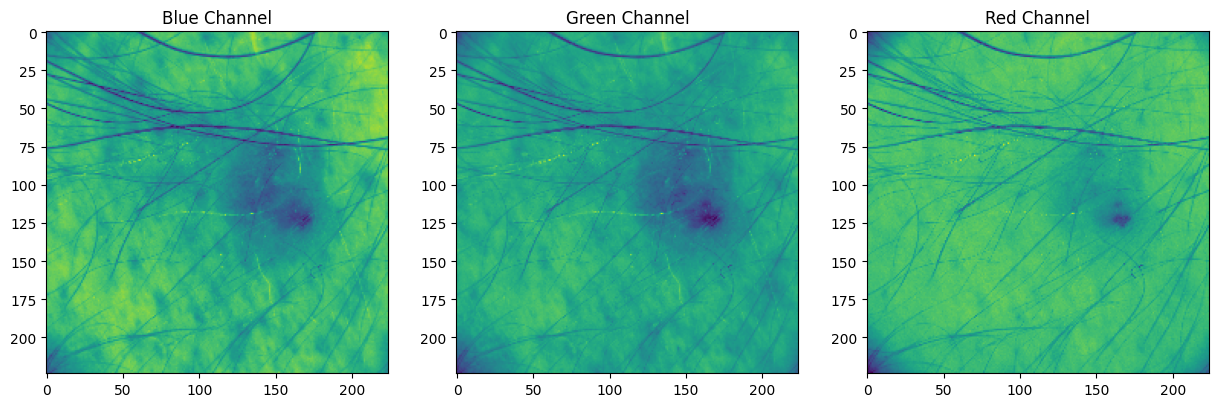

In [136]:
#Splitting into channels
blue,green,red = cv2.split(img)
# Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

In [137]:
blue_temp_df = pd.DataFrame(data = blue)
blue_temp_df


,0,1,2,3,4,5,6,7,8,9,...,214,215,216,217,218,219,220,221,222,223
0,0.333333,0.321569,0.364706,0.384314,0.392157,0.337255,0.376471,0.431373,0.443137,0.447059,...,0.505882,0.560784,0.556863,0.552941,0.541176,0.521569,0.505882,0.490196,0.490196,0.490196
1,0.349020,0.333333,0.368627,0.380392,0.396078,0.396078,0.356863,0.388235,0.431373,0.439216,...,0.572549,0.580392,0.572549,0.560784,0.556863,0.537255,0.509804,0.498039,0.505882,0.509804
2,0.352941,0.349020,0.341176,0.380392,0.403922,0.431373,0.419608,0.372549,0.435294,0.427451,...,0.576471,0.584314,0.572549,0.572549,0.552941,0.549020,0.513725,0.513725,0.525490,0.517647
3,0.349020,0.345098,0.337255,0.364706,0.407843,0.443137,0.450980,0.439216,0.376471,0.411765,...,0.580392,0.588235,0.576471,0.568627,0.568627,0.541176,0.533333,0.537255,0.533333,0.521569
4,0.356863,0.345098,0.352941,0.349020,0.403922,0.439216,0.462745,0.470588,0.435294,0.360784,...,0.588235,0.584314,0.576471,0.564706,0.556863,0.545098,0.549020,0.549020,0.545098,0.525490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,0.345098,0.294118,0.356863,0.380392,0.372549,0.384314,0.372549,0.356863,0.392157,0.403922,...,0.556863,0.556863,0.533333,0.537255,0.509804,0.509804,0.498039,0.458824,0.423529,0.450980
220,0.313725,0.309804,0.352941,0.360784,0.356863,0.341176,0.360784,0.388235,0.388235,0.388235,...,0.545098,0.545098,0.537255,0.521569,0.513725,0.501961,0.474510,0.423529,0.462745,0.443137
221,0.270588,0.321569,0.364706,0.341176,0.349020,0.313725,0.317647,0.364706,0.400000,0.403922,...,0.533333,0.533333,0.525490,0.525490,0.521569,0.482353,0.454902,0.474510,0.458824,0.403922
222,0.294118,0.337255,0.329412,0.337255,0.274510,0.321569,0.372549,0.392157,0.407843,0.415686,...,0.529412,0.525490,0.521569,0.509804,0.478431,0.454902,0.494118,0.474510,0.427451,0.411765


In [138]:

green_temp_df = pd.DataFrame(data = green)
green_temp_df


,0,1,2,3,4,5,6,7,8,9,...,214,215,216,217,218,219,220,221,222,223
0,0.352941,0.352941,0.380392,0.400000,0.396078,0.384314,0.403922,0.435294,0.443137,0.450980,...,0.525490,0.556863,0.560784,0.545098,0.533333,0.521569,0.513725,0.494118,0.498039,0.494118
1,0.352941,0.360784,0.384314,0.400000,0.411765,0.415686,0.396078,0.427451,0.466667,0.454902,...,0.552941,0.564706,0.564706,0.552941,0.549020,0.537255,0.517647,0.501961,0.509804,0.501961
2,0.364706,0.368627,0.380392,0.403922,0.431373,0.447059,0.435294,0.427451,0.443137,0.439216,...,0.560784,0.564706,0.564706,0.549020,0.552941,0.545098,0.513725,0.517647,0.513725,0.509804
3,0.368627,0.372549,0.380392,0.400000,0.439216,0.447059,0.466667,0.450980,0.423529,0.431373,...,0.572549,0.568627,0.560784,0.552941,0.552941,0.537255,0.537255,0.537255,0.529412,0.521569
4,0.380392,0.392157,0.392157,0.403922,0.431373,0.458824,0.470588,0.474510,0.458824,0.427451,...,0.580392,0.549020,0.552941,0.552941,0.545098,0.541176,0.545098,0.545098,0.537255,0.529412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,0.352941,0.321569,0.376471,0.392157,0.392157,0.392157,0.392157,0.380392,0.407843,0.427451,...,0.549020,0.529412,0.525490,0.537255,0.513725,0.486275,0.494118,0.474510,0.423529,0.450980
220,0.321569,0.333333,0.364706,0.372549,0.384314,0.368627,0.384314,0.411765,0.400000,0.403922,...,0.537255,0.533333,0.521569,0.513725,0.505882,0.494118,0.482353,0.423529,0.454902,0.454902
221,0.282353,0.329412,0.376471,0.349020,0.364706,0.356863,0.368627,0.396078,0.419608,0.427451,...,0.525490,0.525490,0.521569,0.509804,0.501961,0.486275,0.443137,0.466667,0.458824,0.419608
222,0.313725,0.349020,0.337255,0.352941,0.329412,0.356863,0.392157,0.400000,0.423529,0.431373,...,0.529412,0.529412,0.513725,0.498039,0.490196,0.447059,0.466667,0.462745,0.435294,0.403922


In [139]:

red_temp_df = pd.DataFrame(data = red)
red_temp_df

,0,1,2,3,4,5,6,7,8,9,...,214,215,216,217,218,219,220,221,222,223
0,0.411765,0.419608,0.450980,0.462745,0.466667,0.454902,0.470588,0.501961,0.513725,0.525490,...,0.584314,0.631373,0.627451,0.623529,0.607843,0.592157,0.584314,0.568627,0.568627,0.568627
1,0.427451,0.431373,0.458824,0.474510,0.482353,0.490196,0.466667,0.498039,0.517647,0.529412,...,0.635294,0.639216,0.627451,0.627451,0.623529,0.607843,0.596078,0.580392,0.592157,0.584314
2,0.443137,0.462745,0.447059,0.478431,0.490196,0.513725,0.509804,0.490196,0.509804,0.521569,...,0.635294,0.647059,0.643137,0.631373,0.623529,0.623529,0.588235,0.600000,0.600000,0.596078
3,0.450980,0.474510,0.474510,0.474510,0.501961,0.513725,0.525490,0.525490,0.498039,0.529412,...,0.647059,0.643137,0.643137,0.635294,0.639216,0.619608,0.611765,0.611765,0.603922,0.600000
4,0.458824,0.458824,0.486275,0.474510,0.498039,0.529412,0.541176,0.545098,0.545098,0.501961,...,0.658824,0.631373,0.639216,0.639216,0.627451,0.619608,0.623529,0.623529,0.623529,0.603922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,0.423529,0.400000,0.450980,0.466667,0.474510,0.466667,0.470588,0.470588,0.501961,0.517647,...,0.623529,0.611765,0.603922,0.607843,0.584314,0.576471,0.576471,0.568627,0.501961,0.545098
220,0.388235,0.411765,0.435294,0.447059,0.450980,0.439216,0.462745,0.486275,0.494118,0.482353,...,0.615686,0.607843,0.596078,0.600000,0.588235,0.580392,0.564706,0.509804,0.537255,0.549020
221,0.364706,0.407843,0.431373,0.419608,0.439216,0.435294,0.443137,0.462745,0.490196,0.501961,...,0.603922,0.592157,0.588235,0.588235,0.584314,0.568627,0.521569,0.541176,0.545098,0.517647
222,0.384314,0.403922,0.407843,0.427451,0.400000,0.423529,0.454902,0.470588,0.494118,0.498039,...,0.600000,0.584314,0.592157,0.580392,0.568627,0.529412,0.545098,0.545098,0.521569,0.482353


In [156]:
# Train PCA on img

pca_b = PCA(n_components=150)
pca_b.fit(blue_temp_df)
trans_pca_b = pca_b.transform(blue_temp_df)

pca_g = PCA(n_components=150)
pca_g.fit(green_temp_df)
trans_pca_g = pca_g.transform(green_temp_df)

pca_r = PCA(n_components=150)
pca_r.fit(red_temp_df)
trans_pca_r = pca_r.transform(red_temp_df)

In [157]:
print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape)

(224, 150)
(224, 150)
(224, 150)


In [158]:
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.9975554994688992
Green Channel: 0.9973116004902299
Red Channel  : 0.9953905248131633


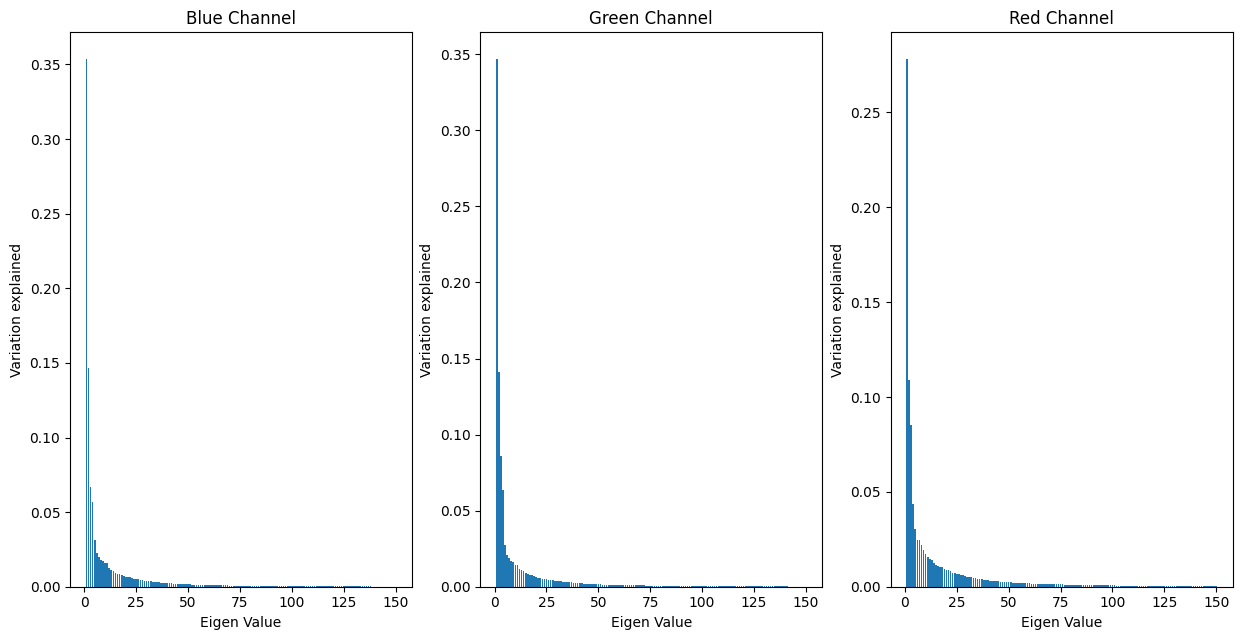

In [159]:
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,151)),pca_b.explained_variance_ratio_)
fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,151)),pca_g.explained_variance_ratio_)
fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,151)),pca_r.explained_variance_ratio_)
plt.show()


We can see that we are at max retaining features only till 20 features

In [160]:
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(224, 224) (224, 224) (224, 224)


In [161]:
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)


(224, 224, 3)


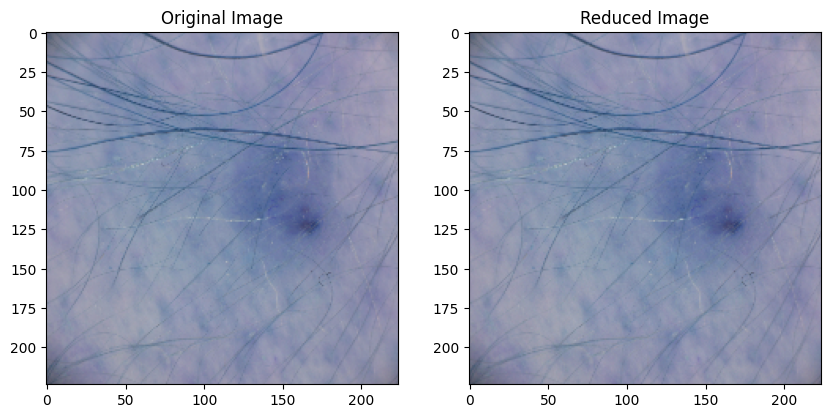

In [162]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()

In [163]:
# Save our PCA model for all the three channels

import pickle

pickle.dump(pca_b, open('pca_b.pkl', 'wb'))
pickle.dump(pca_g, open('pca_g.pkl', 'wb'))
pickle.dump(pca_r, open('pca_r.pkl', 'wb'))



In [164]:

# Apply saved model on all the images of X_train and Y_train

pca_b = pickle.load(open('pca_b.pkl', 'rb'))
pca_g = pickle.load(open('pca_g.pkl', 'rb'))
pca_r = pickle.load(open('pca_r.pkl', 'rb'))


In [165]:
def split_rgb(img):
    blue,green,red = cv2.split(img)
    return blue,green,red

def apply_pca(blue,green,red):
    # Apply PCA to the image channels (RGB). This will allow us to reduce the dimensionality of our data from 3D -> 1
    blue = pca_b.transform(blue)
    green = pca_g.transform(green)
    red = pca_r.transform(red)
    return blue, green, red

def inverse_pca(blue,green,red):
    # Apply PCA to the image channels (RGB). This will allow us to reduce the dimensionality of our data from 3D -> 1
    blue = pca_b.inverse_transform(blue)
    green = pca_g.inverse_transform(green)
    red = pca_r.inverse_transform(red)
    return blue, green, red

def merge_channels(blue,green,red):
    img_reduced= (cv2.merge((blue, green, red)))
    return img_reduced

def apply_pca_to_all_images(X):
    X_pca = []
    for i in range(len(X)):
        img = X[i]
        blue,green,red = split_rgb(img)
        blue,green,red = apply_pca(blue,green,red)
        img_reduced = merge_channels(blue,green,red)
        X_pca.append(img_reduced)
    return X_pca

def inverse_pca_to_all_images(X):
    X_pca = []
    for i in range(len(X)):
        img = X[i]
        blue,green,red = split_rgb(img)
        blue,green,red = inverse_pca(blue,green,red)
        img_reduced = merge_channels(blue,green,red)
        X_pca.append(img_reduced)
    return X_pca


In [166]:

# Apply PCA on X_train

X_train_pca = apply_pca_to_all_images(X_train)
X_train_pca = np.array(X_train_pca)

X_train_pca.shape
    

(1280, 224, 150, 3)

In [167]:

# Apply PCA on X_test

X_test_pca = apply_pca_to_all_images(X_test)
X_test_pca = np.array(X_test_pca)

X_test_pca.shape

(320, 224, 150, 3)

In [168]:
# Save npy files

np.save('X_train_pca.npy', X_train_pca)
np.save('X_test_pca.npy', X_test_pca)

In [169]:
X_train_pca[10].shape

(224, 150, 3)

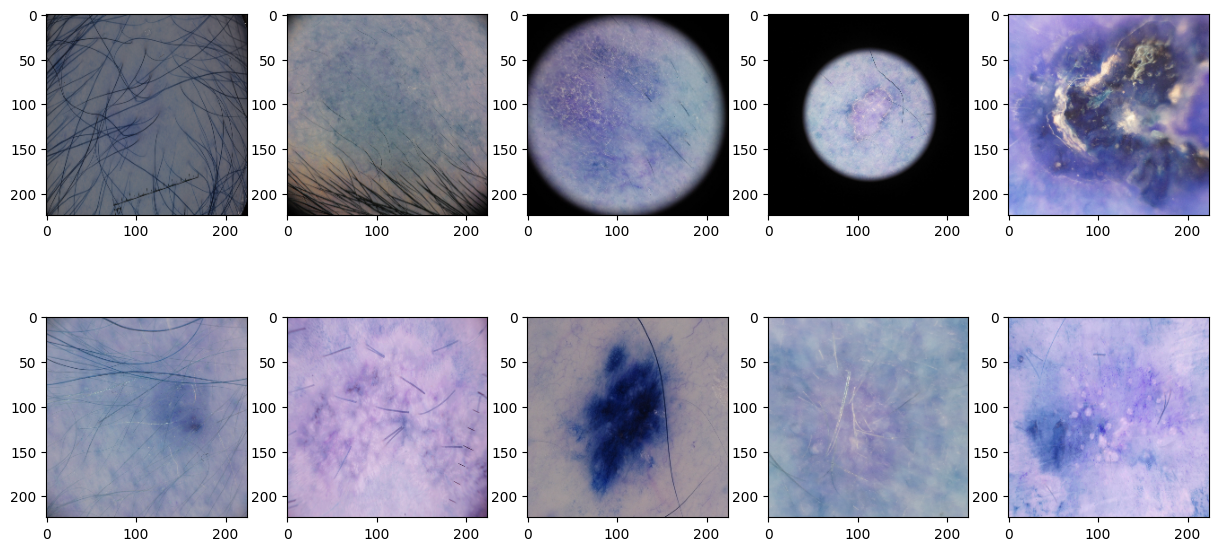

In [170]:
# show a few train images
images= X_train[:10]
fig = plt.figure(figsize = (15, 7.2))
for i in range(10):
    fig.add_subplot(2,5,i+1)
    
    plt.imshow(images[i])
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


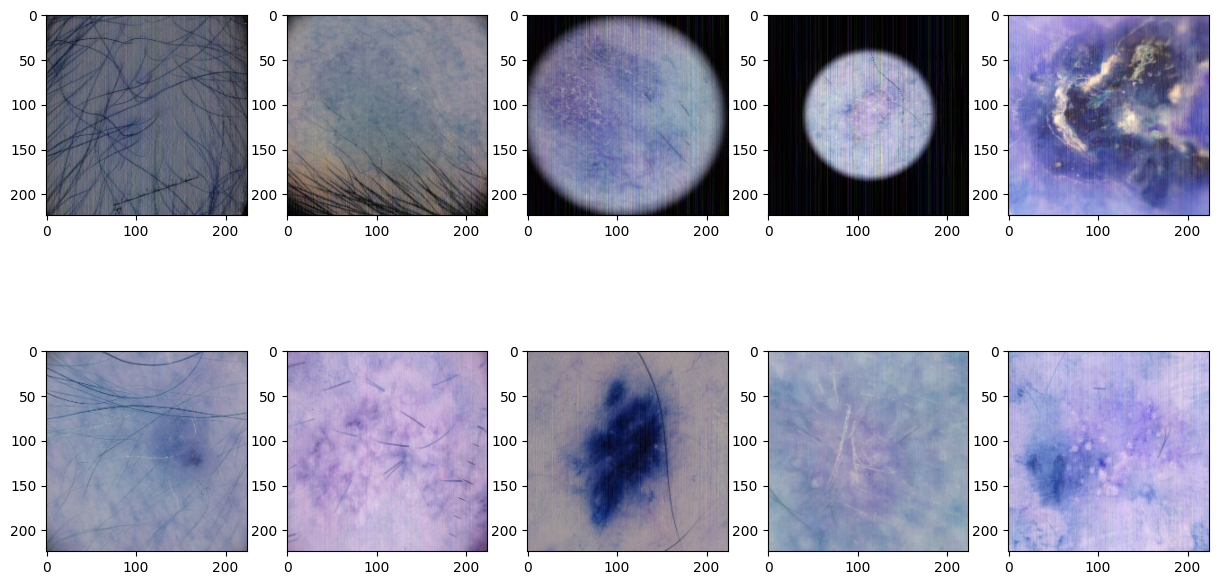

In [171]:

# show a few train images
images= inverse_pca_to_all_images(X_train_pca[:10])
fig = plt.figure(figsize = (15, 8))
for i in range(10):
    fig.add_subplot(2,5,i+1)
    
    plt.imshow(images[i])
plt.show()
